In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import ExcelFile
from pandas import ExcelWriter

In [2]:
!pip install xlrd

You are using pip version 10.0.1, however version 20.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
data=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [5]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [7]:
data.shape

(12043, 23)

In [8]:
#To determine average amount
amount=data['amount']
average_transaction_amount=amount.sum()/amount.count()
print(average_transaction_amount)

187.93358797641784


In [9]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [10]:
data['transaction_id'].unique()

array(['a623070bfead4541a6b0fff8a09e706c',
       '13270a2a902145da9db4c951e04b51b9',
       'feb79e7ecd7048a5a36ec889d1a94270', ...,
       '2fdd4681827343f6af2e6519644a684a',
       '74aa9cd7e4af4c6d9cd7dbd28e9aedc9',
       '6d5218e04e8040b9996850ce11a19426'], dtype=object)

In [11]:
data['customer_id'].unique()

array(['CUS-2487424745', 'CUS-2142601169', 'CUS-1614226872',
       'CUS-2688605418', 'CUS-4123612273', 'CUS-3026014945',
       'CUS-2031327464', 'CUS-2317998716', 'CUS-1462656821',
       'CUS-3142625864', 'CUS-860700529', 'CUS-2370108457',
       'CUS-2630892467', 'CUS-3716701010', 'CUS-3378712515',
       'CUS-2695611575', 'CUS-1669695324', 'CUS-3255104878',
       'CUS-537508723', 'CUS-2376382098', 'CUS-3129499595',
       'CUS-883482547', 'CUS-51506836', 'CUS-1196156254',
       'CUS-2178051368', 'CUS-809013380', 'CUS-3702001629',
       'CUS-127297539', 'CUS-1646183815', 'CUS-164374203',
       'CUS-2283904812', 'CUS-3180318393', 'CUS-3904958894',
       'CUS-1604596597', 'CUS-1617121891', 'CUS-2206365095',
       'CUS-2599279756', 'CUS-3117610635', 'CUS-1433879684',
       'CUS-2500783281', 'CUS-326006476', 'CUS-527400765',
       'CUS-443776336', 'CUS-2663907001', 'CUS-4142663097',
       'CUS-1842679196', 'CUS-3249305314', 'CUS-1271030853',
       'CUS-1646621553', 'CUS-32514

In [12]:
data['movement'].unique()

array(['debit', 'credit'], dtype=object)

In [13]:
#To determine if the dataset has a null value
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [14]:
#As wee see,there is some variables that have 1 unique value.Therefore,we are going to drop those variables 
data1=data.drop(['currency','merchant_code','country'],axis=1)

In [15]:
data1

,status,card_present_flag,bpay_biller_code,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,151.23 -33.96,INTER BANK,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,CUS-2031327464,NaN,debit


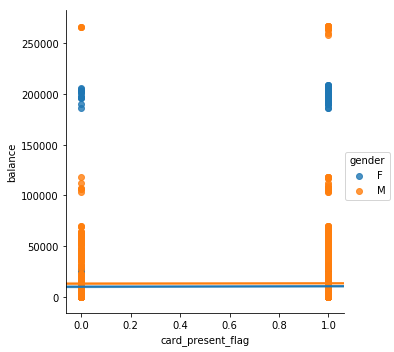

In [16]:
#
sns.lmplot(x='card_present_flag',y='balance',hue='gender',data=data1)

In [17]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxplot',
 'categorical',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'pointplot',
 'rcmod',
 'regplot',
 'regression',
 'reset_defaults'

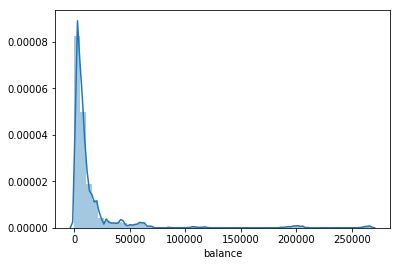

In [18]:
sns.distplot(data1['balance'])

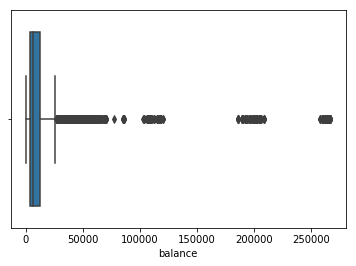

In [19]:
sns.boxplot(data1['balance'])

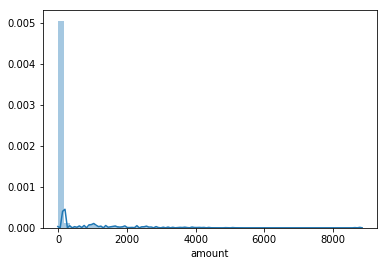

In [20]:
sns.distplot(data1['amount'])

In [21]:
#Using the same transaction dataset, identify the annual salary for each customer
data2=data1[['gender','age','balance','amount']]

In [25]:
#Build a simple regression model to predict the annual salary for each customer using the attributes that was identified above

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
x=data[['age','amount']]
y=data['balance']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
regr=LinearRegression()

In [29]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
#How accurate is our model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

pred=regr.predict(x_train)

In [31]:
pred

array([ 6365.5292139 , 19929.67931674, 23607.35894178, ...,
       21350.70794962, 14162.57348279, 20943.94747176])